# scancode, 200 processes running on the same machine as the graph, 2000 random origins

over the stack so some contents are missing

In [1]:
import pandas as pd
metrics = pd.read_parquet("/home/martin/oar-deployments/2025-06-25-bench3/metrics/179037-200processPerNode", engine="pyarrow")
xp_length = max(metrics.index)-min(metrics.index)
xp_length

7289

actually, we stop the remaining jobs manually

In [2]:
for c in sorted(metrics.columns):
    print(f"total {c}: " + str(metrics[c].sum()))


total bench_case_done: 11258.0
total bench_case_time: 1483543841.4080606
total swhfuse_get_blob: 25169649.0
total swhfuse_not_found: 20864956.0
total swhfuse_process_ObjStorageBackend.get_blob: 2329777.611244
total swhfuse_process_ObjStorage_content_get: 682567.882808
total swhfuse_process_ObjStorage_objstorage_get: 1673698.288181
total swhfuse_process_get_attrs: 307884.53183800005
total swhfuse_process_get_blob: 2399568.959557
total swhfuse_process_get_metadata: 3918670.592762
total swhfuse_process_getattr: 645114.0236259999
total swhfuse_process_lookup: 1043117.9590060001
total swhfuse_process_open: 347939.799113
total swhfuse_process_opendir: 8238.615845
total swhfuse_process_read: 2475356.639725
total swhfuse_process_readdir: 3751557.2388529996
total swhfuse_process_readlink: 157.86895100000004
total swhfuse_waiting_graph: 8972997.293030001
total swhfuse_waiting_objstorage: 7598145.933308
total swhfuse_waiting_storage: 1058199.762346


In [3]:

cases_done = metrics["bench_case_done"].sum()
for c in sorted(metrics.columns):
    print(f"average per process {c}: " + str(metrics[c].sum() / cases_done))

accessed = metrics["swhfuse_get_blob"].sum() - metrics["swhfuse_not_found"].sum()
print(f"Actually accessed files = {accessed}, ie. {accessed / xp_length}/s")

average per process bench_case_done: 1.0
average per process bench_case_time: 131776.85569444488
average per process swhfuse_get_blob: 2235.712293480192
average per process swhfuse_not_found: 1853.344821460295
average per process swhfuse_process_ObjStorageBackend.get_blob: 206.94418291383906
average per process swhfuse_process_ObjStorage_content_get: 60.62958632154912
average per process swhfuse_process_ObjStorage_objstorage_get: 148.66746208749333
average per process swhfuse_process_get_attrs: 27.348066427251737
average per process swhfuse_process_get_blob: 213.14344995176765
average per process swhfuse_process_get_metadata: 348.0787522439154
average per process swhfuse_process_getattr: 57.302720165748795
average per process swhfuse_process_lookup: 92.65570785272696
average per process swhfuse_process_open: 30.906004540149226
average per process swhfuse_process_opendir: 0.7318010166104104
average per process swhfuse_process_read: 219.87534550763903
average per process swhfuse_process_

In [4]:
metrics["swhfuse_not_found"].sum() / metrics["swhfuse_get_blob"].sum()

np.float64(0.8289728633085031)

<Axes: title={'center': 'swh-fuse cumulated waiting times over 200 scancodes'}, xlabel='xp time (s)', ylabel='waiting time (s)'>

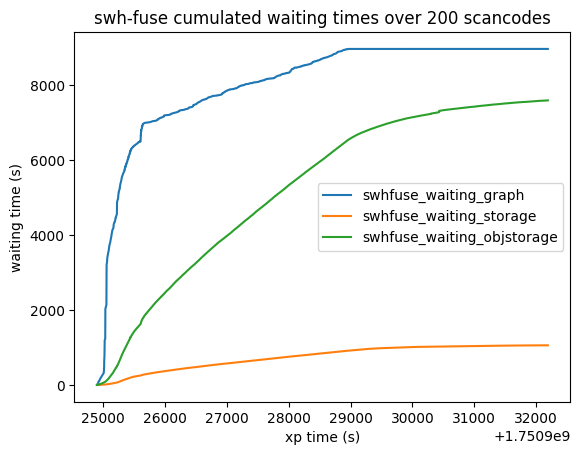

In [5]:
(
    metrics[
        [
            "swhfuse_waiting_graph",
            "swhfuse_waiting_storage",
            "swhfuse_waiting_objstorage",
        ]
    ]
    .sort_index()
    .fillna(0.0)
    .cumsum()
    / 1000
).plot(
    title="swh-fuse cumulated waiting times over 200 scancodes",
    xlabel="xp time (s)",
    ylabel="waiting time (s)",
)

<Axes: title={'center': "Scancode's file access/s"}>

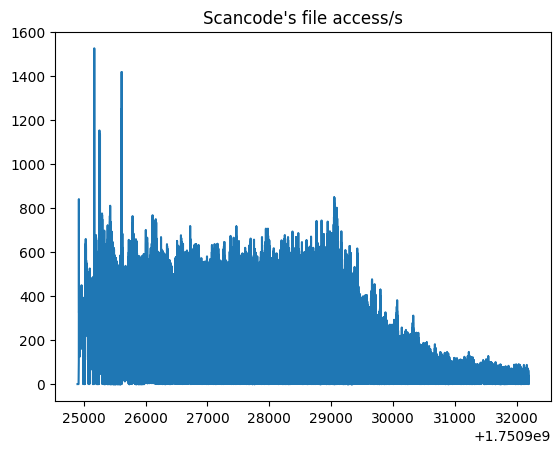

In [6]:
(metrics["swhfuse_get_blob"].sort_index().fillna(0.0) - metrics["swhfuse_not_found"].sort_index().fillna(0.0)).plot(title="Scancode's file access/s")


<Axes: title={'center': 'swh-fuse cumulated CPU time over 200 processes'}, xlabel='xp time (s)', ylabel='CPU time (s)'>

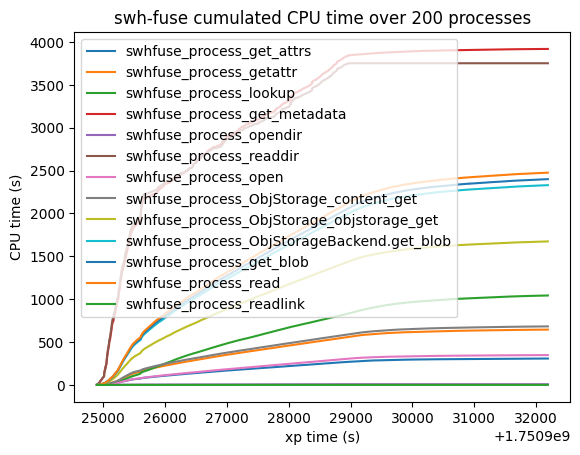

In [7]:
(
    metrics[
        [
            c for c in metrics.columns if c.startswith("swhfuse_process_")
        ]
    ]
    .sort_index()
    .fillna(0.0)
    .cumsum()
    / 1000
).plot(
    title="swh-fuse cumulated CPU time over 200 processes",
    xlabel="xp time (s)",
    ylabel="CPU time (s)",
)

<Axes: title={'center': 'Scancode duration distribution (experience interrupted after 7300s)'}, xlabel='duration (s)', ylabel='#origins'>

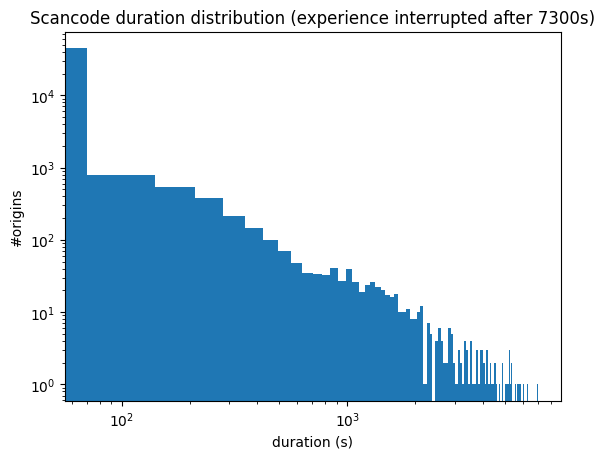

In [12]:
(metrics["bench_case_time"].fillna(0.0)/1000).plot.hist(title="Scancode duration distribution (experience interrupted after 7300s)", bins=100, xlabel="duration (s)", ylabel="#origins", logx=True, logy=True)
